In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [ ]:

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
print(df_load.shape)
df_load.head()


(7113, 22)


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [ ]:
#Tampilkan jumlah ID yang unik
df_load.customerID.nunique()

7017

# Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analis memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

Univariat Analysis — analisis deskriptif dengan satu variabel.

Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.

Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, kamu diminta untuk melihat persebaran dari
distribusi data churn (yes) dan tidak churn (no) dari seluruh data

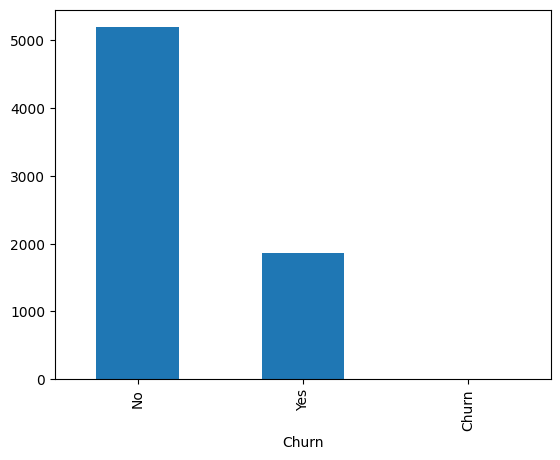

In [8]:
df_load.Churn.value_counts().plot(kind='bar')
plt.show()

## Exploratory Data Analysis (EDA) Variabel Numerik
Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data `df_load` untuk di olah di tahap ini dan gunakan fungsi `subplots()` untuk membuat gambar dan satu set subplot.

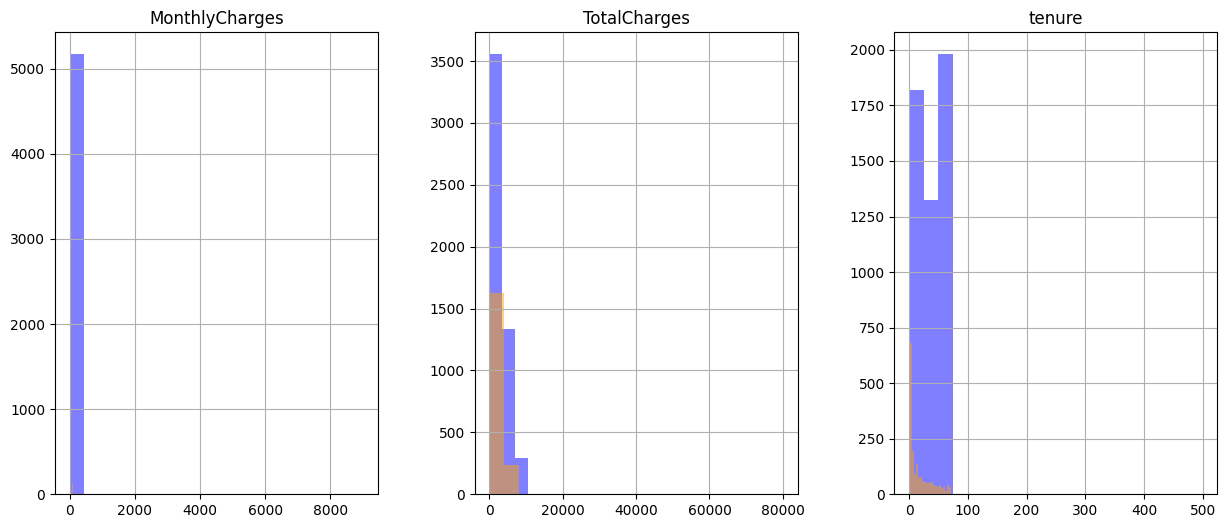

In [9]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

## Exploratory Data Analysis (EDA) Variabel Kategorik
Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data `df_load` untuk di olah di tahap ini. Gunakan fungsi `countplot()` untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable

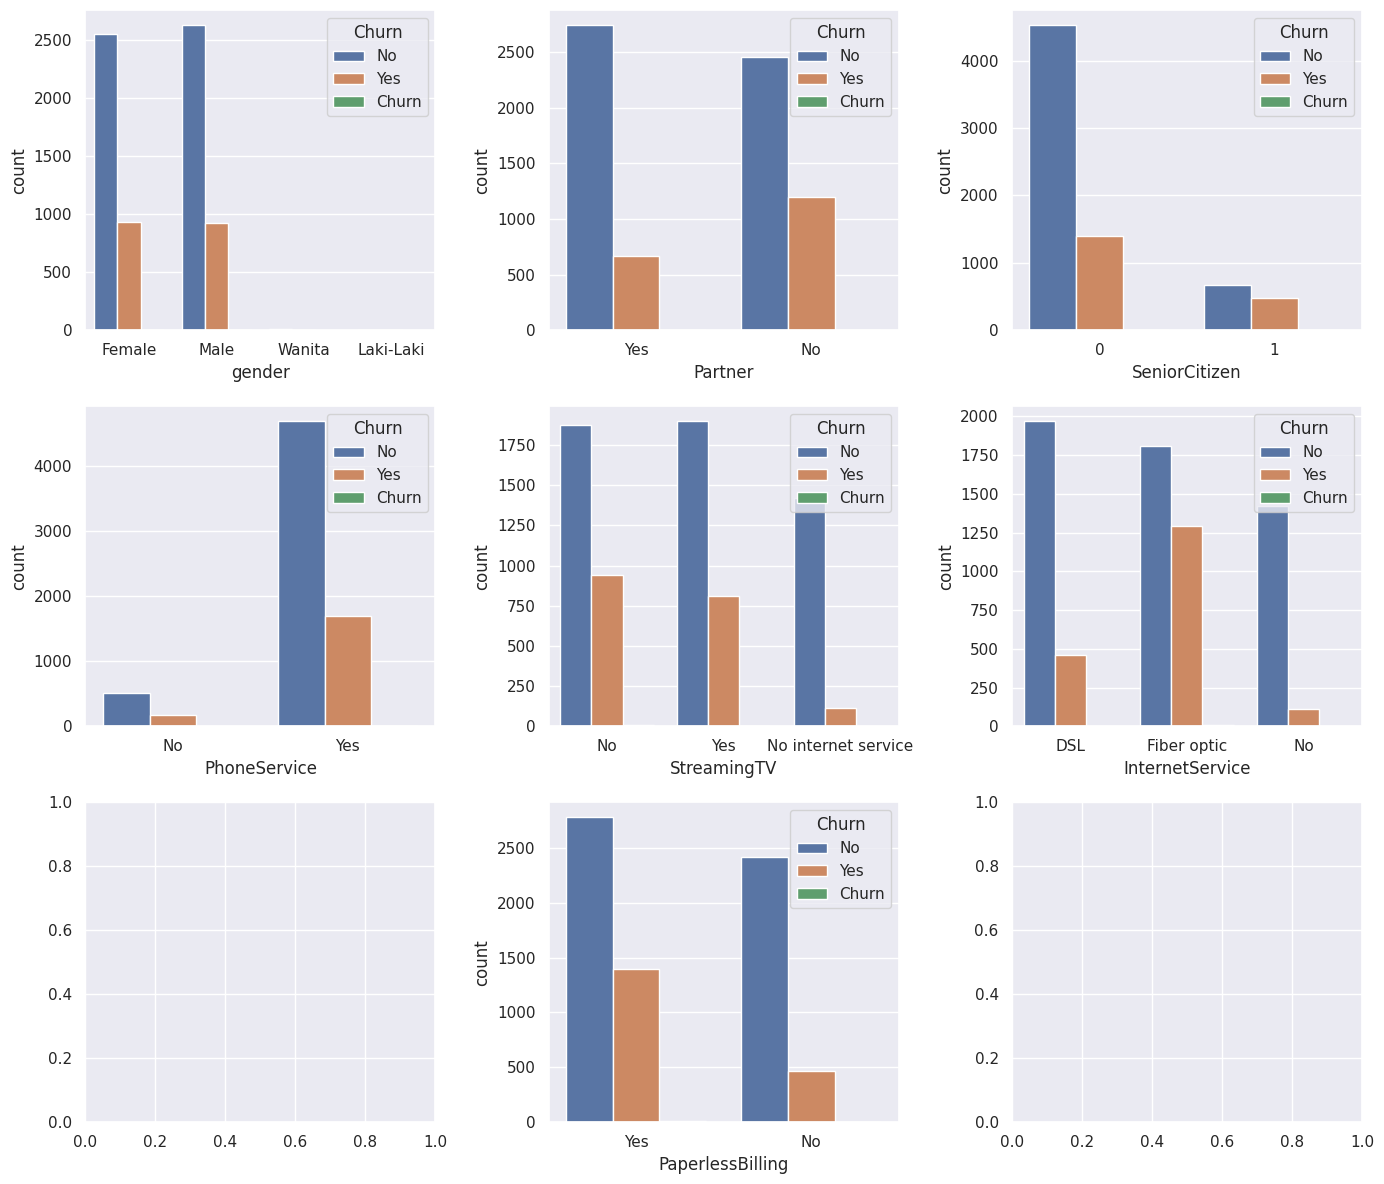

In [10]:
sns.set(style='darkgrid')


fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

pada tahap C.1 dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.

pada tahap C.2 dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.

pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin `(gender)` dan layanan telfonnya `(PhoneService)`. Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner `(partner: No)`, orang-orang yang statusnya adalah senior citizen`(SeniorCitizen: Yes)`, orang-orang yang mempunyai layanan streaming TV `(StreamingTV: Yes)`, orang-orang yang mempunyai layanan Internet `(internetService: Yes)` dan orang-orang yang tagihannya paperless `(PaperlessBilling: Yes)`.

## Menghapus Unnecessary Columns dari data

In [11]:
cleaned_df = df_load.drop(['customerID','UpdatedAt'], axis=1)
print(cleaned_df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No     1.0           No   
1    Male              0      No         No    34.0          Yes   
2    Male              0      No         No     2.0          Yes   
3    Male              0      No         No    45.0           No   
4  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [12]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7113.000000    7113.000000  7113.000000  7113.000000  7014.000000   
mean      1.013637       0.161816     0.483200     1.294531    32.749358   
std       1.002505       0.368308     0.499753     0.461991    25.206376   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     1.000000     9.000000   
50%       2.000000       0.000000     0.000000     1.000000    30.000000   
75%       2.000000       0.000000     1.000000     2.000000    56.000000   
max       3.000000       1.000000     1.000000     2.000000   500.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7113.000000    7113.000000      7113.000000     7113.000000   
mean       0.902995       0.939126         0.871503        0.791087   
std        0.295986       0.948375         0.737718        0.860451   
min        0.000000       0.000

/tmp/ipython-input-2974748277.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-2974748277.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-2974748277.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-2974748277.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue
/tmp/ipython-input-2974748277.py:3: Deprecat

# Splitting Dataset

Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). Gunakan train_test_split() untuk membagi data tersebut. Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya. Simpan hasil spliting data menjadi x_train, y_train, x_test & y_test

In [13]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4979, 19) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4979,)
Persentase Churn di data Training adalah:
Churn
1    0.731070
2    0.261699
3    0.006025
0    0.001205
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2134, 19) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2134,)
Persentase Churn di data Testing adalah:
Churn
1    0.728679
2    0.263824
3    0.006092
0    0.001406
Name: proportion, dtype: float64


# Model Building

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Misalnya isi NaN dengan nilai rata-rata (untuk data numerik)
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train)

log_model = LogisticRegression(max_iter=1000).fit(x_train_imputed, y_train)
print("Model Logistic Regression yang terbentuk adalah:\n", log_model)


Model Logistic Regression yang terbentuk adalah:
 LogisticRegression(max_iter=1000)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluasi Model - Menampilkan Metrics

In [17]:
from sklearn.impute import SimpleImputer
import numpy as np

# Buat imputer (isi NaN dengan mean tiap kolom)
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit ke data train, lalu transform
x_train_imputed = imputer.fit_transform(x_train)

# Kalau ada x_test juga, transform dengan imputer yang sama
x_test_imputed = imputer.transform(x_test)

# Train ulang model
log_model.fit(x_train_imputed, y_train)

# Prediksi
y_train_pred = log_model.predict(x_train_imputed)

# Evaluasi
from sklearn.metrics import classification_report
print("Classification Report Training Model (Logistic Regression) :")
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.83      0.90      0.86      3640
           2       0.63      0.51      0.56      1303
           3       0.00      0.00      0.00        30

    accuracy                           0.79      4979
   macro avg       0.36      0.35      0.36      4979
weighted avg       0.77      0.79      0.78      4979



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre